<a href="https://colab.research.google.com/github/ddarshana04/Machine-Learning/blob/main/K-Means_Clustering/Clustering_of_weather_data_using_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [ ]:
data = pd.read_csv('minute_weather.csv')

In [ ]:
data.shape

(1587257, 13)

In [ ]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [ ]:
sampled_df = data[(data['rowID'] % 10) == 0]
sampled_df.shape

(158726, 13)

In [ ]:
# STATISTICS
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937510,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [ ]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(157812, 13)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import PIL
import pathlib

import tensorflow as tf
from tensorflow import keras

In [ ]:
sampled_df[sampled_df['rain_duration'] == 0].shape

(157237, 13)

In [ ]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [ ]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

In [ ]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [ ]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [ ]:
select_df = sampled_df[features]

In [ ]:
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [ ]:
select_df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
...,...,...,...,...,...,...,...
1587210,915.9,75.56,330.0,1.0,341.0,1.3,47.8
1587220,915.9,75.56,330.0,1.1,341.0,1.4,48.0
1587230,915.9,75.56,344.0,1.4,352.0,1.7,48.0
1587240,915.9,75.20,359.0,1.3,9.0,1.6,46.3


In [ ]:
X = StandardScaler().fit_transform(select_df)
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

In [ ]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model: ", model)

model:  KMeans(n_clusters=12)


In [ ]:
centers = model.cluster_centers_
centers

array([[-0.16819371,  0.86679931, -1.31057879, -0.58989577, -1.16633091,
        -0.6052282 , -0.63848101],
       [-0.83668347, -1.2005881 ,  0.3764936 ,  0.38463488,  0.47488968,
         0.37207957,  1.35997087],
       [ 1.3598505 , -0.08029101, -1.20795139, -0.06227227, -1.07636588,
        -0.04286252, -0.97463052],
       [ 0.22949765, -1.00001182,  0.65522737, -0.54746268,  0.84427286,
        -0.530284  ,  1.16873827],
       [-0.21161193,  0.63679549,  0.4088376 ,  0.7326222 ,  0.51708264,
         0.670973  , -0.15202994],
       [-1.18418052, -0.86540192,  0.44680177,  1.98833456,  0.53795472,
         1.94908877,  0.90389813],
       [ 1.19169107, -0.25312125, -1.15497305,  2.11432135, -1.05317018,
         2.23111557, -1.13509334],
       [ 0.12972705,  0.84414696,  1.41081972, -0.63848937,  1.67467739,
        -0.58936443, -0.71331012],
       [-0.69849741,  0.53893332,  0.17574098, -0.58517272,  0.3452828 ,
        -0.59864987, -0.1134619 ],
       [ 0.23428408,  0.3205

In [ ]:
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [ ]:
def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [ ]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,-0.168194,0.866799,-1.310579,-0.589896,-1.166331,-0.605228,-0.638481,0
1,-0.836683,-1.200588,0.376494,0.384635,0.474890,0.372080,1.359971,1
2,1.359851,-0.080291,-1.207951,-0.062272,-1.076366,-0.042863,-0.974631,2
3,0.229498,-1.000012,0.655227,-0.547463,0.844273,-0.530284,1.168738,3
4,-0.211612,0.636795,0.408838,0.732622,0.517083,0.670973,-0.152030,4
5,-1.184181,-0.865402,0.446802,1.988335,0.537955,1.949089,0.903898,5
6,1.191691,-0.253121,-1.154973,2.114321,-1.053170,2.231116,-1.135093,6
7,0.129727,0.844147,1.410820,-0.638489,1.674677,-0.589364,-0.713310,7
8,-0.698497,0.538933,0.175741,-0.585173,0.345283,-0.598650,-0.113462,8
9,0.234284,0.320513,1.887935,-0.651786,-1.551792,-0.576663,-0.283910,9


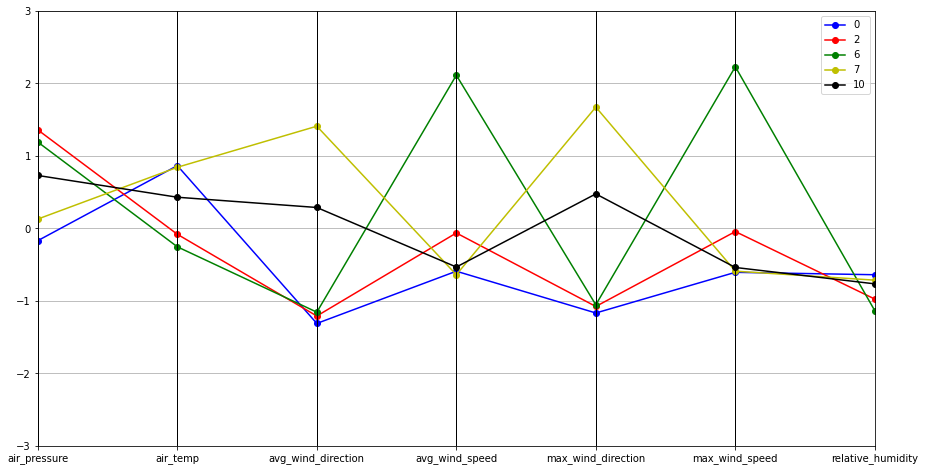

In [ ]:
#DRY DAYS
parallel_plot(P[P['relative_humidity'] < -0.5])

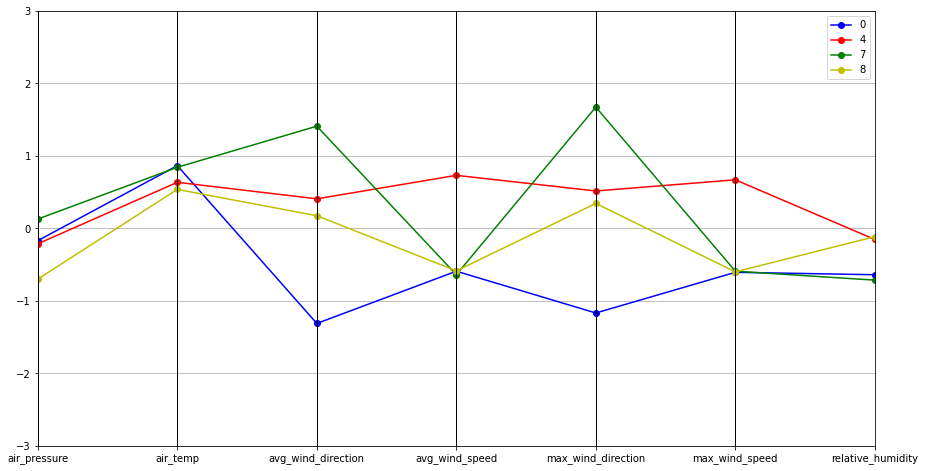

In [ ]:
#WARM DAYS
parallel_plot(P[P['air_temp'] > 0.5])

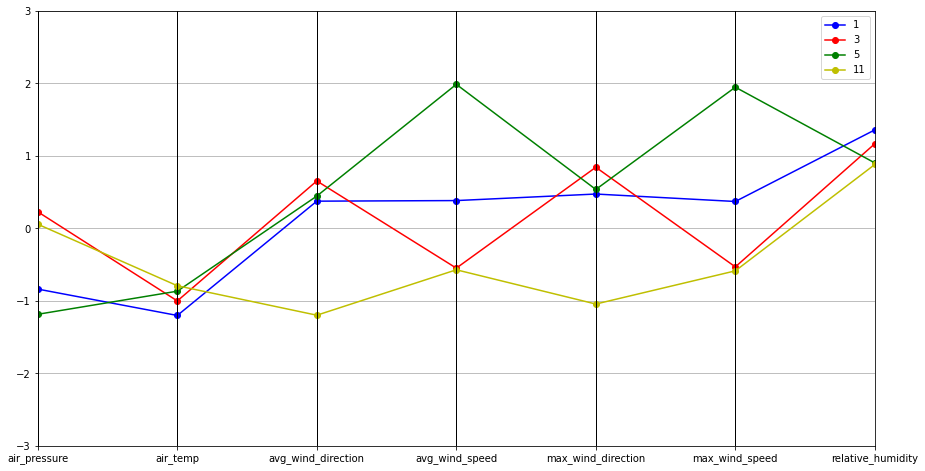

In [ ]:
#COOL DAYS
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])